Import de todas las librerias necesarias.
Nummpy: Operaciones numéricas eficientes y generación de datos aleatorios
Pandas: Manipulación estructurada de datos
Faker: Generación de datos realistas
Matplotlib: Visualización gráfica de datos

In [83]:
import numpy as np
import pandas as pd
from faker import Faker
import matplotlib.pyplot as plt

Inicializamos el generador de datos "Faker" para generar datos realistas como los nombres. Mediante "es_ES" generamos datos en castellano, por defecto los crearía en inglés.

In [84]:
fake = Faker('es_ES')

Configuramos las probabilidades para crear las notas. Suponemos que sacar entre 5 y 7 es lo más habitual, por eso lo establecemos a 0.5 y el otro 0.5 de probabilidad para el resto de notas.


In [85]:
prob_5_7 = 0.5  
prob_resto = 1 - prob_5_7 

Generamos las 1000 notas gracias a la librería numpy y su función random. Estas se encontrarán entre 1 y 10.

In [86]:
notas = np.where(
    np.random.rand(1000) < prob_5_7,  
    np.clip(np.random.normal(loc=6, scale=1, size=1000), 5, 7),  
    np.random.randint(1, 11, size=1000) 
)

Creamos un diccionario de datos estructurado que luego se convertirá en un DataFrame de pandas.
Generamos una lista de 1000 nombres completos aleatorios en español usando Faker, asignamos aleatoriamente una de las 3 asignaturas a cada estudiante y finalmente Asignamos las notas generadas previamente (array NumPy) y las convertimos a enteros.



In [87]:
data = {
    'DNI': np.random.randint(1000, 9999, size=1000),
    'Nombre': [f"{fake.first_name()} {fake.last_name()}" for _ in range(1000)],
    'Asignatura': np.random.choice(['Matematicas', 'Fisica', 'Programacion'], 1000),
    'Nota': notas.astype(int)  # Convertir a enteros
}

Convertimos el diccionario data en una tabla estructurada (DataFrame) de pandas con columnas "Nombre", "Asignatura" y "Nota" y lo guardamos en csv (alumnos_deusto).

Añadimos encoding='utf-8-sig' para que solamente se utilicen los caracteres estandar, ya que sin ello, Faker genera nombres con tildes, por lo que en el csv aparecen mal.

Ejemplo: En vez de Menéndez, aparece MenÃ©ndez

In [88]:
df = pd.DataFrame(data)
df.to_csv('alumnos_deusto.csv', index=False, encoding='utf-8-sig')

Creamos un histograma con las notas del DataFrame, dividiéndolas en 10 intervalos (bins) y añadiendo bordes negros (edgecolor).
Le añadimos título al gráfico ("Distribución de Notas") y etiquetas a los ejes (X: "Nota", Y: "Frecuencia") ty mostramos el histograma.

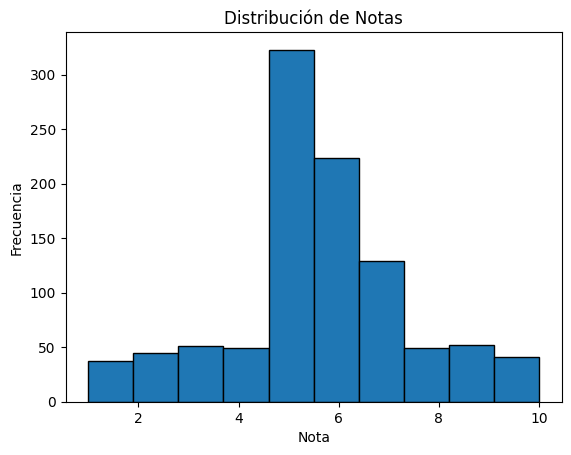

In [89]:
plt.hist(df['Nota'], bins=10, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.show()

Como podemos ver, la mayoría de notas, efectivamente se sitúan entre el 5 y el 7, creando una distribución normal.

Cargamos el csv original para dividirlo en 2 archivos (alumnos  notas)

In [90]:
df = pd.read_csv('alumnos_deusto.csv', encoding='utf-8-sig')

Archivo de alumnos (sin notas)

In [91]:
df[['Nombre']].to_csv('alumnos.csv', index=False)


Archivo de notas (asignatura + nota)

In [92]:
df[['Asignatura', 'Nota']].to_csv('notas.csv', index=False)


## Limpieza

Duplicados: verificamos que no haya. En caso de haber borramos la segunda aparición y lo guardamos en otro csv.

In [93]:
duplicados = df[df["DNI"].duplicated()]

In [94]:
if not duplicados.empty:
    print("Hay DNIs duplicados:")
    print(duplicados)
else:
    print("No hay DNIs duplicados.")

Hay DNIs duplicados:
      DNI              Nombre    Asignatura  Nota
128  1730       Ángela Cámara  Programacion     5
274  1357         Román Acuña  Programacion     6
317  1654      José Luis Ríos        Fisica     9
320  4433  Carmelita Céspedes        Fisica     6
329  2420      Teobaldo Ariza  Programacion     9
..    ...                 ...           ...   ...
962  8557   Desiderio Escrivá   Matematicas     7
974  8739   Gabriela Calderon  Programacion     7
986  7540        Moisés Mateu        Fisica     5
987  6444    Cayetana Alemany        Fisica     9
993  1838  Eleuterio Vendrell   Matematicas     7

[63 rows x 4 columns]


In [95]:
df_sin_duplicados = df.drop_duplicates(subset='DNI', keep='first')
df_sin_duplicados.to_csv("alumnos_deusto_sin_duplicados.csv", index=False)
